<a href="https://colab.research.google.com/github/CoderButNoob/Loan-Approval-prediction/blob/main/Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
df = pd.read_csv('/Copy of loan - loan.csv')

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


<Axes: >

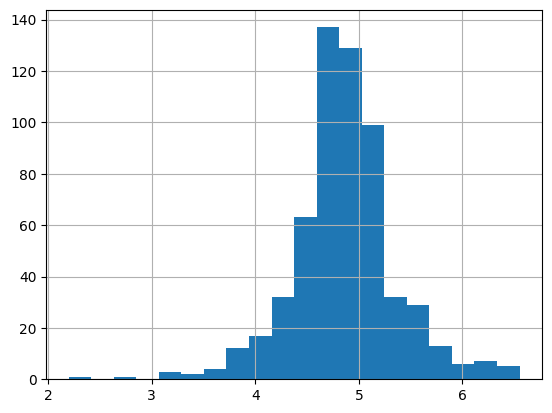

In [8]:
df['loanAmount_Log'] = np.log(df['LoanAmount'])
df['loanAmount_Log'].hist(bins=20)

<Axes: >

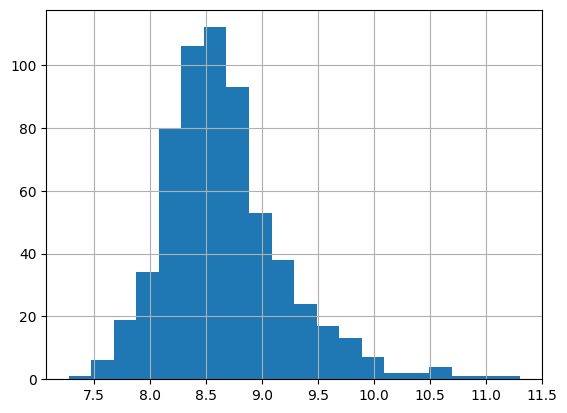

In [9]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['Total_Income_Log'] = np.log(df['Total_Income'])
df['Total_Income_Log'].hist(bins=20)

In [10]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)


df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.loanAmount_Log =  df.loanAmount_Log.fillna(df.loanAmount_Log.mean())



df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [11]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [12]:
  x= df.iloc[:,np.r_[1:5,9:11,13:15]].values
  y= df.iloc[:,12].values

In [13]:
x

array([['Male', 'No', '0', ..., 1.0, 4.857444178729352, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [14]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [15]:
print("per of missing gender is %2f%%" %((df['Gender'].isnull().sum()/df.shape[0])*100))

per of missing gender is 0.000000%


Number of ppl wo take loan group y gender :
Gender
Male      502
Female    112
Name: count, dtype: int64


<ipython-input-16-37aa0c194eb0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender',data=df,palette='hls')


<Axes: xlabel='Gender', ylabel='count'>

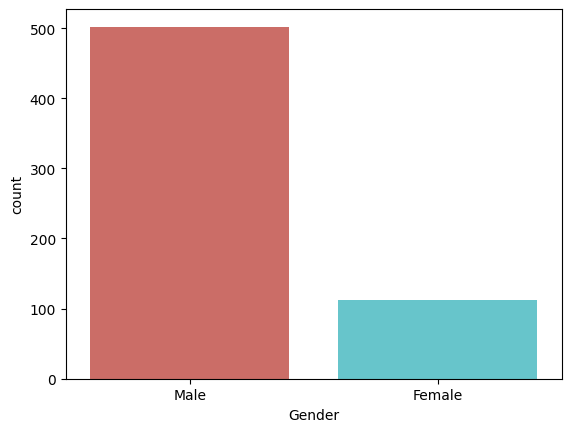

In [16]:
print("Number of ppl wo take loan group y gender :")
print(df['Gender'].value_counts())
sns.countplot(x='Gender',data=df,palette='hls')

Number of ppl wo take loan group y marital status :
Married
Yes    401
No     213
Name: count, dtype: int64


<ipython-input-17-a4ef8640e625>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Married',data=df,palette='hls')


<Axes: xlabel='Married', ylabel='count'>

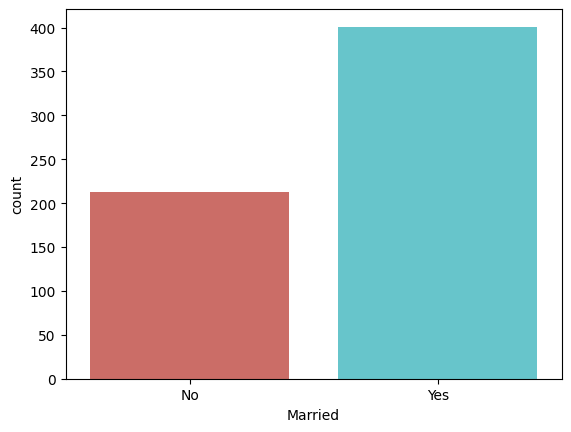

In [17]:
print("Number of ppl wo take loan group y marital status :")
print(df['Married'].value_counts())
sns.countplot(x='Married',data=df,palette='hls')

Number of ppl wo take loan group y dependents :
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


<ipython-input-18-cbe9d34eb3ed>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Dependents',data=df,palette='rainbow')


<Axes: xlabel='Dependents', ylabel='count'>

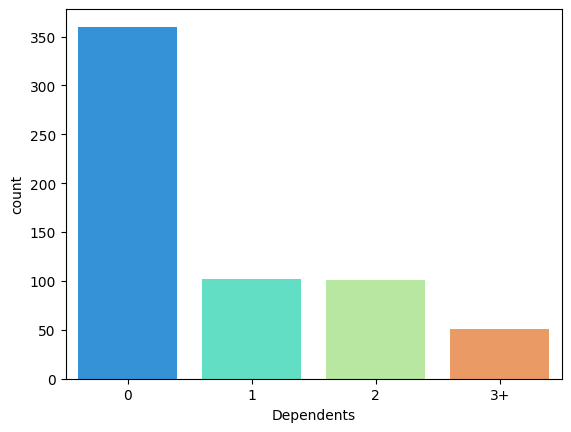

In [18]:
print("Number of ppl wo take loan group y dependents :")
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents',data=df,palette='rainbow')

Number of ppl wo take loan group y self-employeed :
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


<ipython-input-19-615071bf2581>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Self_Employed',data=df,palette='Set2')


<Axes: xlabel='Self_Employed', ylabel='count'>

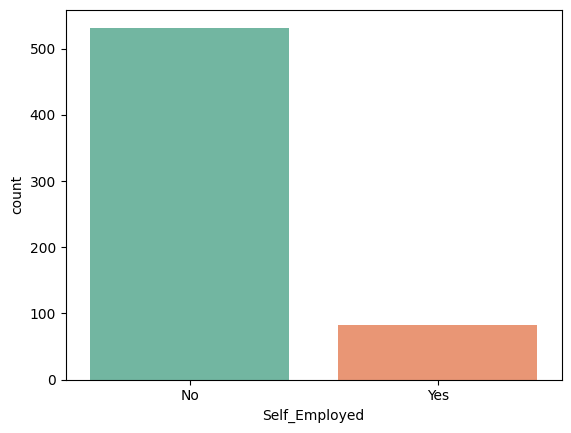

In [19]:
print("Number of ppl wo take loan group y self-employeed :")
print(df['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed',data=df,palette='Set2')

Number of ppl wo take loan group y Loan Amount :
LoanAmount
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: count, Length: 204, dtype: int64


<ipython-input-20-8a87c70bdf35>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='LoanAmount',data=df,palette='Set1')


<Axes: xlabel='LoanAmount', ylabel='count'>

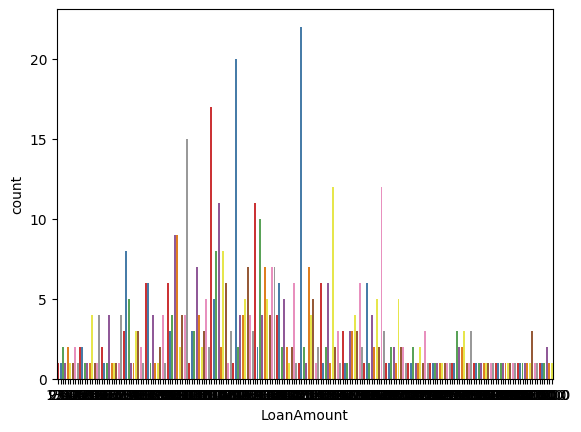

In [20]:
print("Number of ppl wo take loan group y Loan Amount :")
print(df['LoanAmount'].value_counts())
sns.countplot(x='LoanAmount',data=df,palette='Set1')

Number of ppl wo take loan group y Credit History :
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


<ipython-input-21-232a691babaa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Credit_History',data=df,palette='hls')


<Axes: xlabel='Credit_History', ylabel='count'>

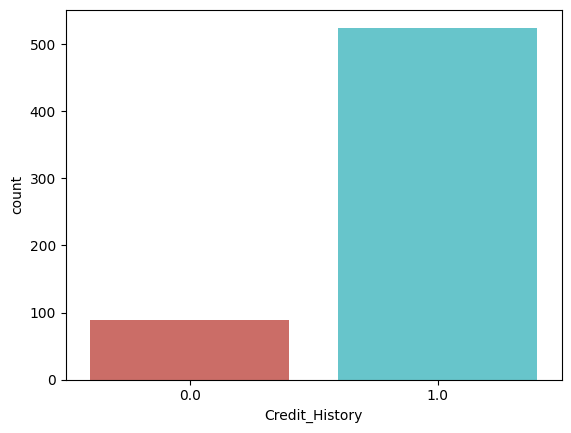

In [21]:
print("Number of ppl wo take loan group y Credit History :")
print(df['Credit_History'].value_counts())
sns.countplot(x='Credit_History',data=df,palette='hls')

In [22]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

from sklearn.preprocessing import LabelEncoder
LabelEncoder_x = LabelEncoder()


In [23]:
for i in range(0,5):
  x_train[:,i]= LabelEncoder_x.fit_transform(x_train[:,i])
  x_train[:,7] = LabelEncoder_x.fit_transform(x_train[:,7])

x_train

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 267],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 407],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 249],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 363],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 273],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 301]], dtype=object)

In [24]:
LabelEncoder_y = LabelEncoder()

y_train = LabelEncoder_y.fit_transform(y_train)

y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [25]:
for i in range(0,5):
  x_test[:,i]= LabelEncoder_x.fit_transform(x_test[:,i])
  x_test[:,7] = LabelEncoder_x.fit_transform(x_test[:,7])

x_test


array([[1, 0, 0, 0, 5, 1.0, 4.430816798843313, 85],
       [0, 0, 0, 0, 5, 1.0, 4.718498871295094, 28],
       [1, 1, 0, 0, 5, 1.0, 5.780743515792329, 104],
       [1, 1, 0, 0, 5, 1.0, 4.700480365792417, 80],
       [1, 1, 2, 0, 5, 1.0, 4.574710978503383, 22],
       [1, 1, 0, 1, 3, 0.0, 5.10594547390058, 70],
       [1, 1, 3, 0, 3, 1.0, 5.056245805348308, 77],
       [1, 0, 0, 0, 5, 1.0, 6.003887067106539, 114],
       [1, 0, 0, 0, 5, 0.0, 4.820281565605037, 53],
       [1, 1, 0, 0, 5, 1.0, 4.852030263919617, 55],
       [0, 0, 0, 0, 5, 1.0, 4.430816798843313, 4],
       [1, 1, 1, 0, 5, 1.0, 4.553876891600541, 2],
       [0, 0, 0, 0, 5, 1.0, 5.634789603169249, 96],
       [1, 1, 2, 0, 5, 1.0, 5.4638318050256105, 97],
       [1, 1, 0, 0, 5, 1.0, 4.564348191467836, 117],
       [1, 1, 1, 0, 5, 1.0, 4.204692619390966, 22],
       [1, 0, 1, 1, 5, 1.0, 5.247024072160486, 32],
       [1, 0, 0, 1, 5, 1.0, 4.882801922586371, 25],
       [0, 0, 0, 0, 5, 1.0, 4.532599493153256, 1],
       [1, 1

In [26]:
LabelEncoder_y = LabelEncoder()

y_test  = LabelEncoder_y.fit_transform(y_test)

y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [27]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(x_train,y_train)

RandomForestClassifier()

In [29]:
from sklearn import metrics

y_predict = rf.predict(x_test)

print("acc of RandomForest is", metrics.accuracy_score(y_predict,y_test))

y_predict

acc of RandomForest is 0.7804878048780488


array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1])

In [30]:
from sklearn.naive_bayes import  GaussianNB

nb = GaussianNB()

nb.fit(x_train,y_train)

GaussianNB()

In [31]:
y_predict = nb.predict(x_test)

print("acc of naive baise is",metrics.accuracy_score(y_predict,y_test))

acc of naive baise is 0.8292682926829268


In [32]:
y_predict

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [33]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [34]:
y_predict = dt.predict(x_test)

print("acc of dicision tree classifier  is",metrics.accuracy_score(y_predict,y_test))

acc of dicision tree classifier  is 0.7073170731707317


In [35]:
y_predict

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1])

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(x_train,y_train)

KNeighborsClassifier()

In [37]:
y_predict = knn.predict(x_test)

print("acc of KNeighbour classifier is",metrics.accuracy_score(y_predict,y_test))

acc of KNeighbour classifier is 0.7967479674796748


In [38]:
y_predict

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])